In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def annotateBars(row, ax):
    prev_val = 0.
    offset = -1.5
    for col in row.index:
        value = row[col]
        if (str(value) != 'nan'):
            ax.text(value/2 + prev_val + offset, labeltonum(row.name), col + ":" + "%.1f" % np.exp(value), color='yellow')
            prev_val += value
            offset += 0.5

In [12]:
def labeltonum(label):
    if label == 'ST-GCN':
        return 0
    elif label == 'ST-TR':
        return 1
    elif label == 'STAR':
        return 2

In [13]:
# create dataframe
df = pd.DataFrame({'Conv2d': [np.log(260400), np.log(81570), np.nan],
                   'BatchNorm2d': [np.log(737), np.log(38.4), np.nan],
                   'ReLU': [np.log(184), np.log(19.2), np.nan],
                   'Linear': [np.nan, np.nan, np.log(6200)],
                   'SiLU': [np.nan, np.nan, np.log(22)]},
                  index=['ST-GCN', 'ST-TR', 'STAR'])

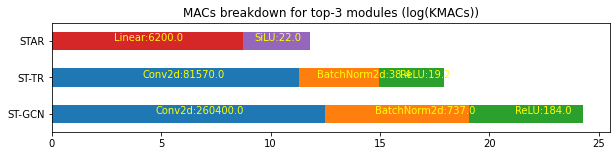

In [14]:
# plot dataframe
ax = df.plot.barh(title="MACs breakdown for top-3 modules (log(KMACs))",
                  legend=False,
                  figsize=(10,2), stacked=True)
df.apply(annotateBars, ax=ax, axis=1)
fig = ax.get_figure()
fig.savefig('mac_breakdown.pdf', dpi=300, bbox_inches='tight')

In [15]:
# create dataframe
df = pd.DataFrame({'Conv2d': [np.log(3060), np.log(2700), np.nan],
                   'BatchNorm2d': [np.log(6.4), np.log(1.5), np.nan],
                   'Linear': [np.log(15.4), np.log(30.8), np.log(83.2)]},
                  index=['ST-GCN', 'ST-TR', 'STAR'])

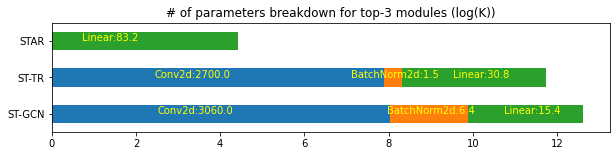

In [16]:
# plot dataframe
ax = df.plot.barh(title="# of parameters breakdown for top-3 modules (log(K))",
                  legend=False,
                  figsize=(10,2), stacked=True)
df.apply(annotateBars, ax=ax, axis=1)
fig = ax.get_figure()
fig.savefig('params_breakdown.pdf', dpi=300, bbox_inches='tight')

In [17]:
# create dataframe
df = pd.DataFrame({'Conv2d': [np.log(23510), np.log(5710), np.nan],
                   'BatchNorm2d': [np.log(19920), np.log(118.97), np.nan],
                   'ReLU': [np.log(4490), np.log(236.9), np.nan],
                   'Linear': [np.nan, np.nan, np.log(1190)],
                   'SiLU': [np.nan, np.nan, np.log(268.22)]},
                  index=['ST-GCN', 'ST-TR', 'STAR'])

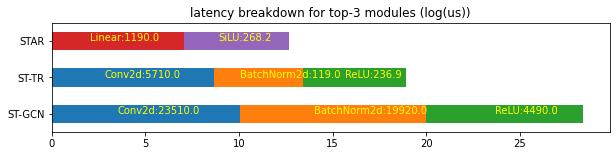

In [18]:
# plot dataframe
ax = df.plot.barh(title="latency breakdown for top-3 modules (log(us))",
                  legend=False,
                  figsize=(10,2), stacked=True)
df.apply(annotateBars, ax=ax, axis=1)
fig = ax.get_figure()
fig.savefig('latency_breakdown.pdf', dpi=300, bbox_inches='tight')